In [1]:
import warnings #To remove warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression

# Prepare Data and Import


In [2]:
#Strip the first line from the input .csv file
def getheaders(filename):
    with open(filename) as infile:
        first_line = infile.readline()

    result = [x.strip() for x in first_line.split(',')]
    return result

def getdata(filename, headers):
    data = pd.read_csv(filename, header=None, names = headers)
    data.head()
    data = data.drop(data.index[0])     #Drop header text
    data = data.astype('float64')       #Convert to float
    data.insert(0, "winner", 0) #Insert column for comparison
    return data

#numattr is the number of columns for your classification
def prepare(data, numattr):
    #Compare the percent of votes for each candidate and insert into winner column
    data.loc[data['trump'] > data['clinton'], "winner"] = 0 #Trump
    data.loc[data['clinton'] > data['trump'], "winner"] = 1 #Clinton

    #print(data)

    X = data.iloc[:,3:3+numattr].values #Get last two columns
    y = data.iloc[:,0:1].values #Get first two columns #Clinton-Trump

    X = np.insert(X, 0, 1, axis=1)

    # we build a boolean index
    where_are_zeros = (y==0)
    y[where_are_zeros] = -1

    return X,y

# Visualize 2D Data

In [3]:
def visualize(X, y, col1, col2):
    positive_indexes = np.where(y == 1)[0]  #Clinton
    negative_indexes = np.where(y == -1)[0] #Trump

    positive = X[positive_indexes]  # positive rows
    negative = X[negative_indexes]  # negative rows

    #print(negative)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive[:,1:2], positive[:,2:], s=50, c='b', marker='o', label='Clinton')
    ax.scatter(negative[:,1:2], negative[:,2:], s=50, c='r', marker='x', label='Trump')
    ax.legend()
    ax.set_xlabel('%'+col1)
    ax.set_ylabel('%'+col2)

    plt.show()

# Visualize 3D Data

In [4]:
def visualize_3d(X, y, col1, col2, col3):
    positive_indexes = np.where(y == 1)[0]  #Clinton
    negative_indexes = np.where(y == -1)[0] #Trump

    positive = X[positive_indexes]  # positive rows
    negative = X[negative_indexes]  # negative rows

    #print(positive[:,3:])
    #print(negative)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(positive[:,1:2], positive[:,2:3], positive[:,3:], s=50, c='b', marker='o', label='Clinton')
    ax.scatter(negative[:,1:2], negative[:,2:3], negative[:,3:], s=50, c='r', marker='x', label='Trump')
    ax.legend()
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_zlabel(col3)

    plt.show()

# Percent of Foreign Born People related to Percent of Population in Poverty

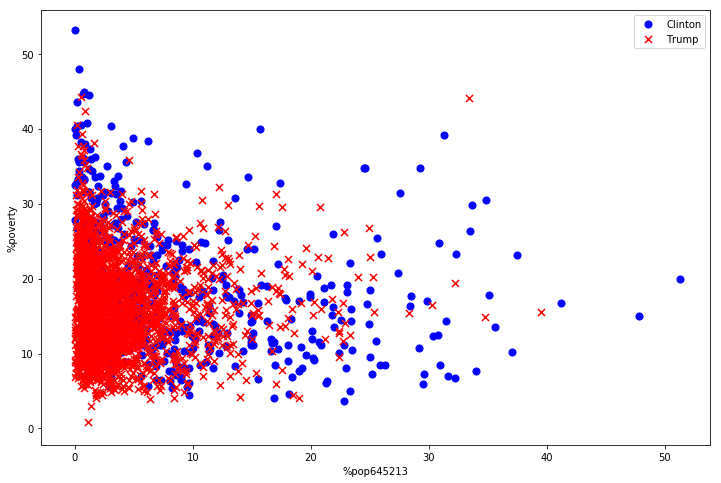

In [5]:
filename = "data.csv"

headers = getheaders(filename)

data = getdata(filename, headers)
    
X,y = prepare(data, 2)
    
visualize(X,y,headers[2],headers[3])

# Linear Classifier on the previous data

In [6]:
reg = LinearRegression().fit(X,y.ravel())
print("Percent matching: " + str(reg.score(X,y)))

Percent matching: 0.18338344111119123


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


# Perceptron Classifier on previous data

In [7]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X,y.ravel())
print("Percent matching: " + str(clf.score(X,y)))

Percent matching: 0.8431876606683805


# SVM Classifier on the previous data

In [8]:
clf = svm.SVC(gamma = 0.001, C=100)
clf.fit(X,y.ravel())
result = clf.predict(X)

match = 0
for num in range (len(result)):
    if(result[num] == y[num]):
            match = match + 1

print("Percent matching: " + str(match/len(result)))

Percent matching: 0.8631105398457584


# Percent of Non-English Speakers related to Percent of population with a Bachelors Degree

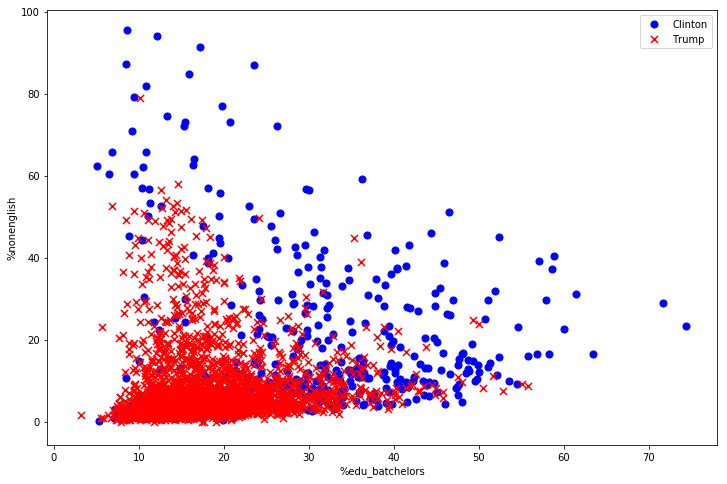

In [9]:
filename = "data1.csv"

headers = getheaders(filename)

data = getdata(filename, headers)
    
X,y = prepare(data, 2)
    
visualize(X,y,headers[2],headers[3])

# Linear Classifier on the previous data

In [10]:
reg = LinearRegression().fit(X,y.ravel())
print("Percent matching: " + str(reg.score(X,y)))

Percent matching: 0.2310423095802585


# Perceptron Classifier on previous data

In [11]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X,y.ravel())
print("Percent matching: " + str(clf.score(X,y)))

Percent matching: 0.843508997429306


# SVM Classifier on the previous data

In [12]:
clf = svm.SVC(gamma = 0.001, C=100)
clf.fit(X,y.ravel())
result = clf.predict(X)

match = 0
for num in range (len(result)):
    if(result[num] == y[num]):
            match = match + 1

print("Percent matching: " + str(match/len(result)))

Percent matching: 0.8833547557840618


# Poverty, income and number of veterans

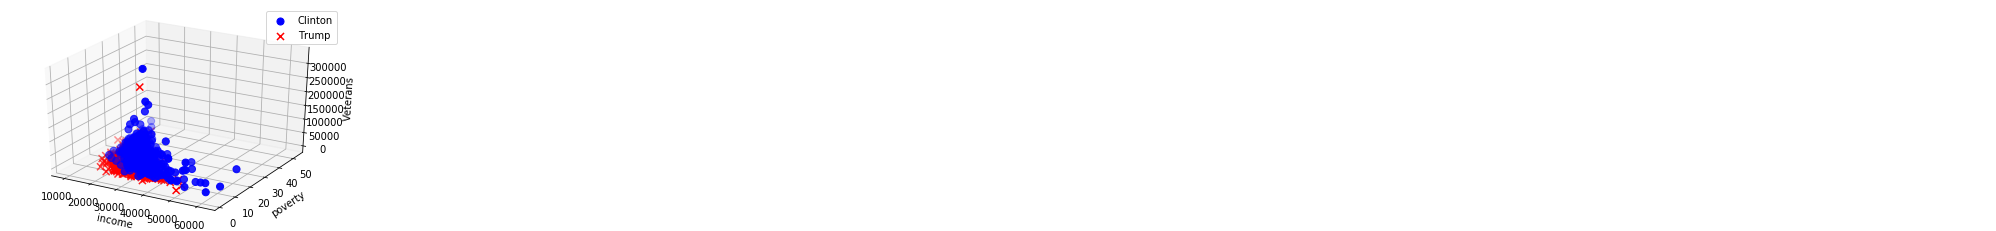

In [13]:
filename = "data3.csv"

headers = getheaders(filename)

data = getdata(filename, headers)
    
X,y = prepare(data, 3)
    
visualize_3d(X,y,headers[2],headers[3], 'Veterans')

# Linear Classifier on the previous data

In [14]:
reg = LinearRegression().fit(X,y.ravel())
print("Percent matching: " + str(reg.score(X,y)))

Percent matching: 0.27521329408291006


# Perceptron Classifier on previous data

In [15]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X,y.ravel())
print("Percent matching: " + str(clf.score(X,y)))

Percent matching: 0.849293059125964


#   SVM Classifier on the 3D Data

In [16]:
clf = svm.SVC(gamma = 0.001, C=100)
clf.fit(X,y.ravel())
result = clf.predict(X)

match = 0
for num in range (len(result)):
    if(result[num] == y[num]):
            match = match + 1
            
print("Percent matching: " + str(match/len(result)))

Percent matching: 1.0
